In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:\\Users\\Brian\\Desktop\\archive\datascience_salaries.csv")

In [3]:
data.head

<bound method NDFrame.head of       Unnamed: 0       job_title    job_type experience_level       location  \
0              0  Data scientist   Full Time           Senior  New York City   
1              2  Data scientist   Full Time           Senior         Boston   
2              3  Data scientist   Full Time           Senior         London   
3              4  Data scientist   Full Time           Senior         Boston   
4              5  Data scientist   Full Time           Senior  New York City   
...          ...             ...         ...              ...            ...   
1166        2243          ML Ops   Full Time           Senior        Toronto   
1167        2249          ML Ops   Full Time           Senior         Boston   
1168        2250          ML Ops   Full Time           Senior          Delhi   
1169        2255          ML Ops   Full Time           Senior  San Francisco   
1170        2259          ML Ops  Internship           Senior  New York City   

     sala

In [4]:
data.plot

In [5]:
#load libraries
library(ggplot2)
library(tidyverse)
library(lubridate)
library(readxl)
library(gridExtra)
library(magrittr)
library(scales)
library(summarytools)
library(plotrix)
library(RColorBrewer)

NameError: name 'library' is not defined

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
data.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [9]:
data.describe()

,Unnamed: 0,salary
count,1171.000000,1171.000000
mean,931.620837,64836.037575
std,647.445266,32551.767046
min,0.000000,30000.000000
25%,364.500000,45000.000000
50%,815.000000,63000.000000
75%,1504.500000,68000.000000
max,2259.000000,228000.000000


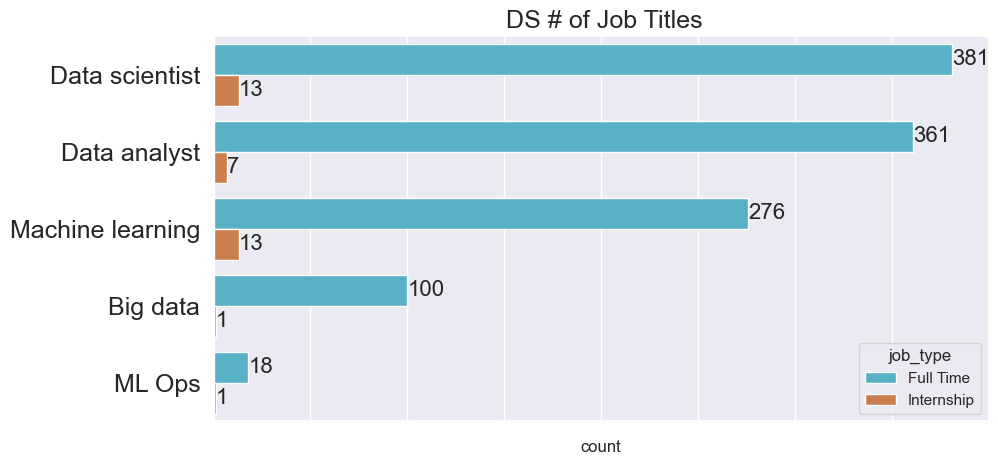

In [11]:
fig , ax = plt.subplots(figsize=(10, 5))
sns.set(style='darkgrid')

sns.countplot(data =data,y ='job_title',order = data['job_title'].value_counts().index,
              hue = 'job_type',palette = ["#44bcd8","#e07b39"])
ax.set_yticklabels( ax.get_yticklabels(), fontsize = 18)

ax.set_title(' DS # of Job Titles', fontsize = 18)
ax.set_ylabel('')

ax.set(xticklabels=[])
for i in ax.containers:
    ax.bar_label(i,fontsize = 16)

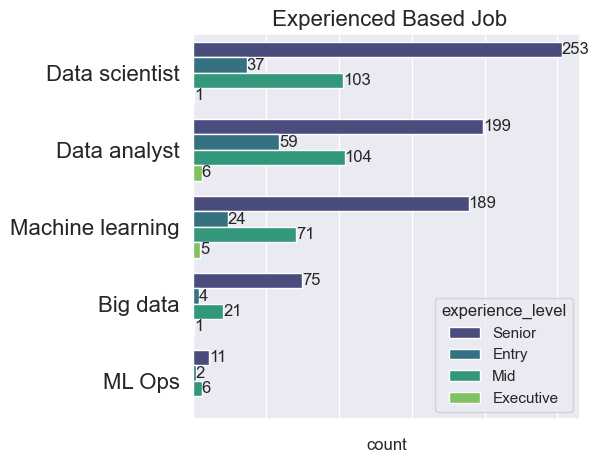

In [13]:
fig , ax = plt.subplots(figsize=(5, 5))
sns.set(style='darkgrid')

sns.countplot(data =data,y ='job_title',order = data['job_title'].value_counts().index,
              hue = 'experience_level',palette = 'viridis')
ax.set_yticklabels( ax.get_yticklabels(), fontsize = 16)

ax.set_title(' Experienced Based Job', fontsize = 16)
ax.set_ylabel('')

ax.set(xticklabels=[])
for i in ax.containers:
    ax.bar_label(i,fontsize = 12)

In [14]:
data.isnull().count()

Unnamed: 0          1171
job_title           1171
job_type            1171
experience_level    1171
location            1171
salary_currency     1171
salary              1171
dtype: int64

In [15]:
data.na().count()

AttributeError: 'DataFrame' object has no attribute 'na'

In [17]:
location_counts = data['location'].value_counts().head(20)


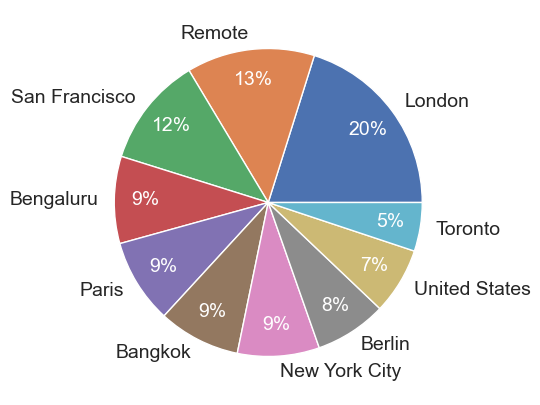

In [19]:
fig = plt.gcf()
fig.set_size_inches(5, 5)

_, _, autotexts = plt.pie(location_counts.values,labels = location_counts.index, autopct='%1.0f%%', pctdistance=0.8, labeldistance = 1.1,textprops={'fontsize': 14})

for ins in autotexts:
    ins.set_color('white')
plt.show()

In [20]:
#the best places to be a data scientist is by far london,remote,sanfransisco


In [22]:
#max salaries
print(data['salary'].nlargest(5))
# min salary
data['salary'].min()

1087    228000
1166    228000
442     225000
896     201000
936     200000
Name: salary, dtype: int64


30000

(30000.0, 81000.0)

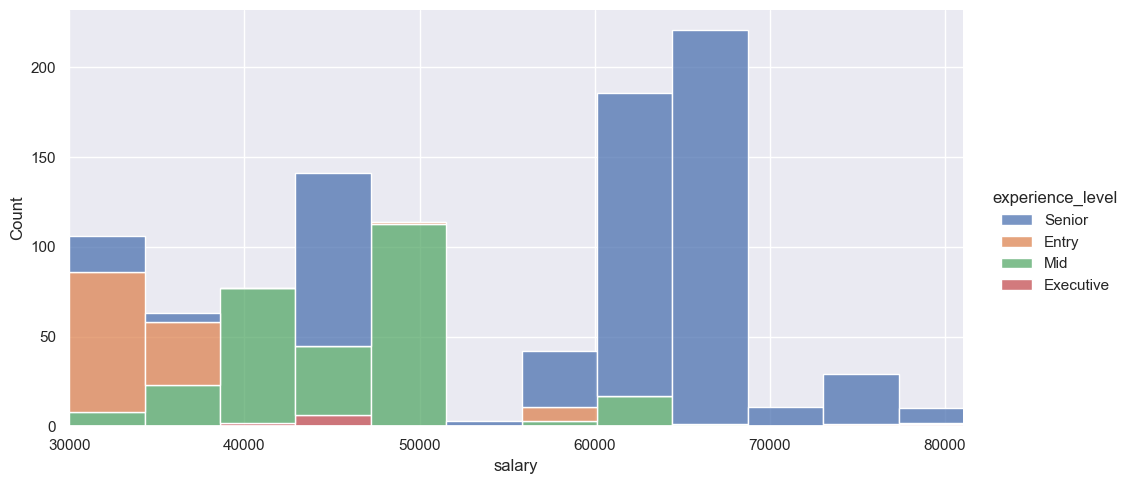

In [24]:
# minimum to 85 percentile salries analysis

ax =sns.displot(data = data,x = 'salary',hue = 'experience_level',multiple="stack",height=5,aspect = 2)
plt.xlim(data['salary'].min(),np.percentile( data['salary'],85))

In [25]:
fig = go.Figure()

fig.add_trace(go.Box(y=data["salary"], boxmean="sd"))

fig.update_layout(height=100, title="Mean salaries")
fig.show()

NameError: name 'go' is not defined

In [26]:
#Import dependencies

from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [28]:
fig = go.Figure()

fig.add_trace(go.Box(y=data["salary"], boxmean="sd"))

fig.update_layout(height=1000, title="Mean salaries")
fig.show()

In [29]:
#therefore there is a steady increase of salaries from mid level of experience 

In [31]:
px.pie(data, names="job_title", hole=0.5, title="Job title distribution")

In [32]:
from sklearn.model_selection import train_test_split
# select the columns you want to use as features
X = data[['Job Title', 'Employment Type', 'Level', 'Location', 'Currency', 'Salary']]

# select the column you want to predict
y = data['data science']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "None of [Index(['Job Title', 'Employment Type', 'Level', 'Location', 'Currency',\n       'Salary'],\n      dtype='object')] are in the [columns]"

In [34]:
import pandas as pd

data = [[0, 'Data scientist', 'Full Time', 'Senior', 'New York City', 'USD', 149000], 
        [2, 'Data scientist', 'Full Time', 'Senior', 'Boston', 'USD', 120000], 
        [3, 'Data scientist', 'Full Time', 'Senior', 'London', 'USD', 68000], 
        [4, 'Data scientist', 'Full Time', 'Senior', 'Boston', 'USD', 120000], 
        [5, 'Data scientist', 'Full Time', 'Senior', 'New York City', 'USD', 149000], 
        [6, 'Data scientist', 'Full Time', 'Senior', 'London', 'USD', 68000], 
        [7, 'Data scientist', 'Full Time', 'Senior', 'Research Triangle Park', 'USD', 69000], 
        [8, 'Data scientist', 'Full Time', 'Senior', 'Sydney', 'USD', 68000], 
        [9, 'Data scientist', 'Full Time', 'Senior', 'San Francisco', 'USD', 140000], 
        [10, 'Data scientist', 'Full Time', 'Senior', 'Sofia', 'USD', 68000], 
        [12, 'Data scientist', 'Full Time', 'Entry', 'BangPa-in', 'USD', 35000], 

        

SyntaxError: unexpected EOF while parsing (2697413878.py, line 15)

In [35]:
px.pie(data, names="job_title", hole=0.5, title="Job title distribution")

In [37]:
jobTypeGroups = data.groupby("job_type")

fig = go.Figure()

for i in data.job_type.unique():
    fig.add_trace(go.Box(y=jobTypeGroups.get_group(i).salary, boxmean="sd", name=i+" mean salary",hovertext=data["job_title"]))

fig.update_layout(title="Salaries based on job type")
fig.show()

In [38]:
px.box(data, y="salary", x="job_title", color="job_title", facet_col="job_type", title="Salaries of different jobs based on job types")

In [40]:
px.scatter(data, x=data.index, y="salary", title="Scatter distribution of salaries")

In [41]:
px.histogram(data, x="salary", nbins=10, facet_col="job_title", title="Distribution of salaries based on job")

In [43]:
px.histogram(data, x="salary", nbins=10, facet_col="experience_level", title="Distribution of salaries based on experience level")

In [ ]:
Conclusion
The analysis of the data give us the next statements:
Data scientist and data analyst are the most common jobs in this dataset.
As a senior data scientist one will earn more